$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 5 $$

# `01` Assignment 01

- Design your LSTM learning model to classify hand-written digits (MNIST dataset).
- To handle images as a sequence, the LSTM input can be seen as a 28 sequences
of 28 elements each (taking each row of pixels as a single time step input).
- Then, you can use dense layer(s) on top (connected to the
output of the LSTM).
- Important Notes:
  - Image Size: $28\times28$
  - Use $80\%$ of the provided training data for training and $20\%$ for validation (Keep the test data for testing after training).
  - Use $32$ units in the LSTM layer and $15\%$ recurrent dropout.
  - Use Categorical Cross Entropy for the loss calculation, `Adam` for optimization and `accuracy` for metrics.


  **Additional Requirements**:
  - Try adding a second LSTM layer before the dense layer(s).
  - Change the number of cells to $48, 96, 256$ and report the accuracy curve.

## `+` Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM, ConvLSTM2D, MaxPooling2D, Reshape, Dropout, BatchNormalization, Input, Flatten
from keras.callbacks import EarlyStopping

# `+` Seed Value

In [4]:
SEED = 907

## `+` Load & Preprocess MNIST Dataset

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=SEED)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f"Shape of X_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {x_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (48000, 28, 28)
Shape of y_train: (48000,)
Shape of X_val: (12000, 28, 28)
Shape of y_val: (12000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### Preview the Images

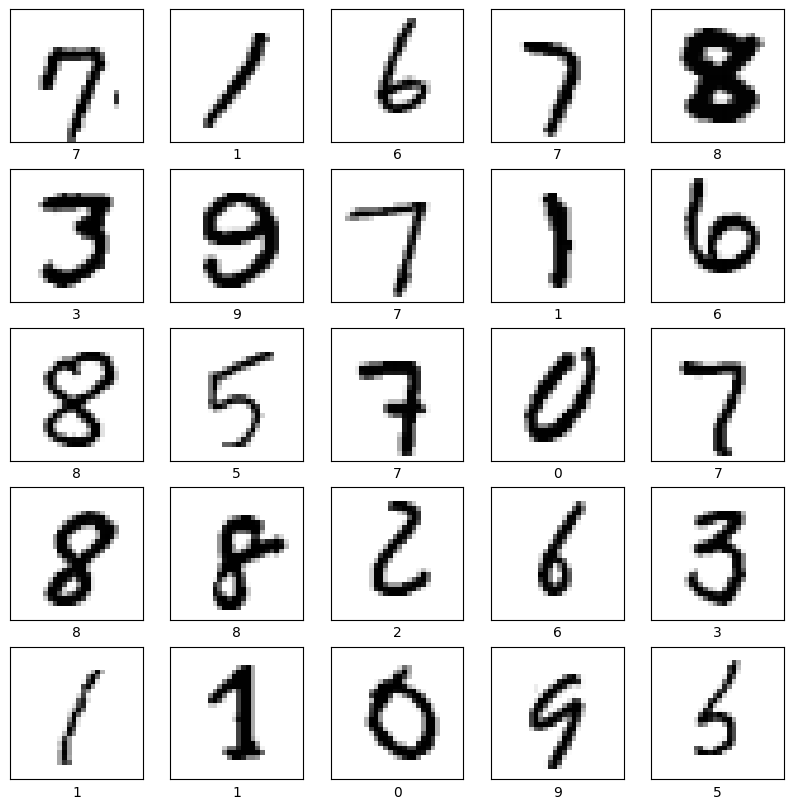

In [ ]:
# plot first few images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

### OneHotEncode Target Variable

In [ ]:
y_train

array([7, 1, 6, ..., 9, 5, 7], dtype=uint8)

In [6]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

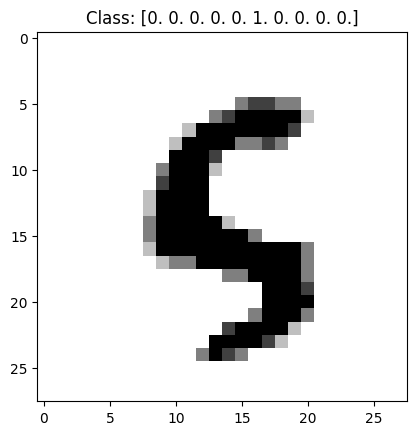

In [ ]:
sample= 158
plt.imshow(x_train[sample], cmap=plt.cm.binary)
plt.title(f'Class: {y_train[sample]}')
plt.show()

### Rescale Independent Features

In [7]:
# Rescale the Input
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## `+` Set Global Parameters

In [8]:
BATCH_SIZE  = 60
EPOCHS      = 20

---
##   `#` Base Model:

## `i` Model Design

In [ ]:
#Model Build
model_base = Sequential()
model_base.add(LSTM(32, input_shape=(28,28)))
model_base.add(Dropout(0.15))
model_base.add(Dense(10, activation='softmax'))

## `ii` Model Compilation & Training

In [ ]:
#Model Compile
model_base.compile(optimizer='adam',  loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Model train
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_base=model_base.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val, y_val), callbacks=[early_stop])

Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5139 - loss: 1.4487 - val_accuracy: 0.8861 - val_loss: 0.3888
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9000 - loss: 0.3558 - val_accuracy: 0.9354 - val_loss: 0.2276
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9353 - loss: 0.2312 - val_accuracy: 0.9442 - val_loss: 0.1918
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9498 - loss: 0.1785 - val_accuracy: 0.9567 - val_loss: 0.1428
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9577 - loss: 0.1503 - val_accuracy: 0.9650 - val_loss: 0.1203
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9639 - loss: 0.1308 - val_accuracy: 0.9663 - val_loss: 0.1105
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9681 - loss: 0.1152 - val_accuracy: 0.9682 - val_loss: 0.1088
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9701 - loss: 0.1056 - v

## `iii` Model Evaluation

In [ ]:
loss_train, accuracy_train = model_base.evaluate(x_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_val, accuracy_val = model_base.evaluate(x_val, y_val)
print(f"Accuracy for validation: {accuracy_val:.4%}")

loss_test, accuracy_test = model_base.evaluate(x_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9885 - loss: 0.0383
Accuracy for training: 98.8688%
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9805 - loss: 0.0651
Accuracy for validation: 98.1167%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9746 - loss: 0.0893
Accuracy for testing: 97.9600%


## `iv` Result Visualization

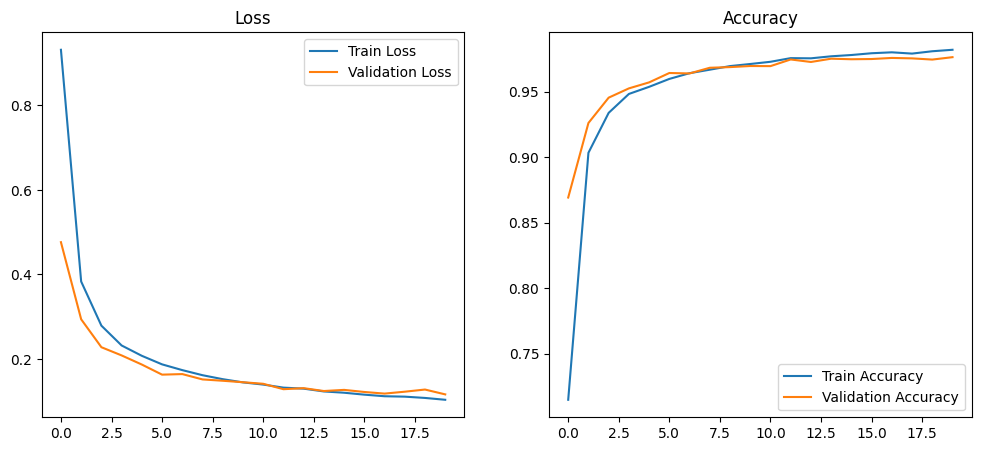

In [ ]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_base.history['loss'], label='Train Loss')
plt.plot(history_base.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_base.history['accuracy'], label='Train Accuracy')
plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()



## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


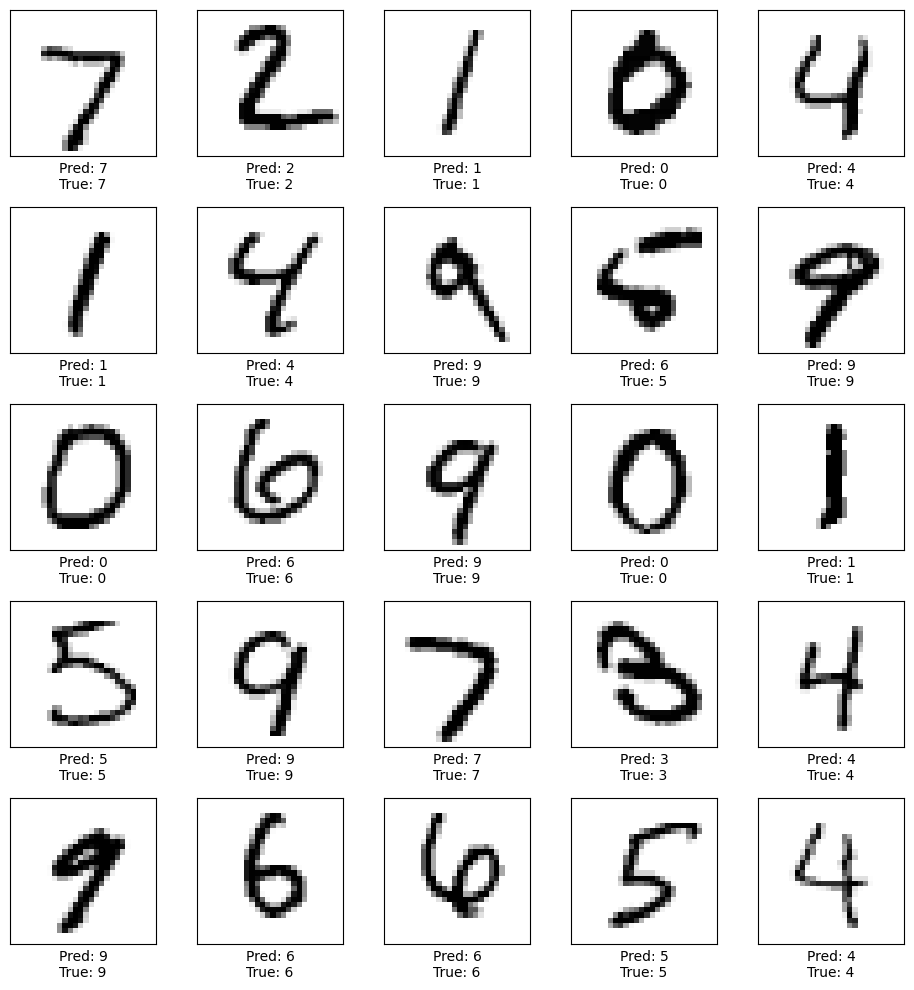

In [ ]:
# Predict the classes of the test samples
y_pred = model_base.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot some of the test samples along with their predicted and true classes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {y_pred_classes[i]}\nTrue: {y_true[i]}")
    plt.tight_layout()
plt.show()


---
## `#` LSTM two layers:

## `i` Model Design

In [ ]:
#Model Build
model_LSTM = Sequential()
model_LSTM.add(LSTM(128, input_shape=(28,28), return_sequences=True))
model_LSTM.add(LSTM(64))
model_LSTM.add(Dropout(0.15))
model_LSTM.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## `ii` Model Compilation & Training

In [ ]:
#Model Compile
model_LSTM.compile(optimizer='adam',  loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Model train
history_LSTM=model_LSTM.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val, y_val))

Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.7101 - loss: 0.8602 - val_accuracy: 0.9470 - val_loss: 0.1763
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 76s 92ms/step - accuracy: 0.9550 - loss: 0.1534 - val_accuracy: 0.9608 - val_loss: 0.1220
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 88s 100ms/step - accuracy: 0.9715 - loss: 0.0957 - val_accuracy: 0.9790 - val_loss: 0.0664
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 70s 85ms/step - accuracy: 0.9784 - loss: 0.0736 - val_accuracy: 0.9799 - val_loss: 0.0663
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.9824 - loss: 0.0591 - val_accuracy: 0.9824 - val_loss: 0.0578
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 68s 85ms/step - accuracy: 0.9853 - loss: 0.0503 - val_accuracy: 0.9870 - val_loss: 0.0469
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.9869 - loss: 0.0437 - val_accuracy: 0.9831 - val_loss: 0.0621
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 77s 85ms/step - accuracy: 0.9884 - loss: 0.0380 -

## `iii` Model Evaluation

In [ ]:
loss_train, accuracy_train = model_LSTM.evaluate(x_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_val, accuracy_val = model_LSTM.evaluate(x_val, y_val)
print(f"Accuracy for validation: {accuracy_val:.4%}")

loss_test, accuracy_test = model_LSTM.evaluate(x_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.9974 - loss: 0.0080
Accuracy for training: 99.7229%
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9912 - loss: 0.0408
Accuracy for validation: 99.1167%
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9845 - loss: 0.0532
Accuracy for testing: 98.8400%


------------------------------

# Assignment 02
- Repeat assignment `01` using `ConvLSTM1D` layer instead of `LSTM`: An LSTM utilizing the power of convolutions. Read more [here](https://paperswithcode.com/method/convlstm) and [here](https://medium.com/neuronio/an-introduction-to-convlstm-55c9025563a7).
- Use the same parameters from assignment `01` in addition to:
  - Kernel Size -> Try $1$ and $3$. Which is better?
  - Padding = `same` or `valid` -> Is there a big difference?

**Note:** You might need to reshape the input (Hint: check `keras.layers.Reshape` layer)

------------------------------

## `#` `kernal = 1, padding = same`

## `i` Model Design

In [46]:
# Model Build
model_Conv1 = Sequential()
model_Conv1.add(Input(shape=(28, 28)))
model_Conv1.add(Reshape((1, 28, 28, 1)))
model_Conv1.add(ConvLSTM2D(32, (1, 1), return_sequences=False, padding='same'))
model_Conv1.add(BatchNormalization())
model_Conv1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_Conv1.add(Flatten())
model_Conv1.add(Dense(10, activation='softmax'))

## `ii` Model Compilation & Training

In [47]:
#Model Compile
model_Conv1.compile(optimizer='adam',  loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
#Model train
history_Conv1=model_Conv1.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val, y_val))

Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8573 - loss: 0.4759 - val_accuracy: 0.9233 - val_loss: 0.2783
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9215 - loss: 0.2745 - val_accuracy: 0.9262 - val_loss: 0.2539
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9272 - loss: 0.2534 - val_accuracy: 0.9291 - val_loss: 0.2529
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9285 - loss: 0.2472 - val_accuracy: 0.8980 - val_loss: 0.3376
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9290 - loss: 0.2435 - val_accuracy: 0.9112 - val_loss: 0.3035
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9324 - loss: 0.2341 - val_accuracy: 0.9108 - val_loss: 0.3055
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9310 - loss: 0.2353 - val_accuracy: 0.9319 - val_loss: 0.2516
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9321 - loss: 0.2313 - val_accuracy: 0.

## `iii` Model Evaluation

In [49]:
loss_train, accuracy_train = model_Conv1.evaluate(x_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_val, accuracy_val = model_Conv1.evaluate(x_val, y_val)
print(f"Accuracy for validation: {accuracy_val:.4%}")

loss_test, accuracy_test = model_Conv1.evaluate(x_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9424 - loss: 0.1973
Accuracy for training: 94.3333%
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9320 - loss: 0.2507
Accuracy for validation: 93.3167%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9257 - loss: 0.2709
Accuracy for testing: 93.3900%


---
## `#` `kernal = 3, padding = same`

## `i` Model Design

In [30]:
# Model Build
model_Conv3 = Sequential()
model_Conv3.add(Input(shape=(28, 28)))
model_Conv3.add(Reshape((1, 28, 28, 1)))
model_Conv3.add(ConvLSTM2D(32, (3, 3), return_sequences=False, padding='same'))
model_Conv3.add(BatchNormalization())
model_Conv3.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_Conv3.add(Flatten())
model_Conv3.add(Dense(10, activation='softmax'))

## `ii` Model Compilation & Training

In [31]:
#Model Compile
model_Conv3.compile(optimizer='adam',  loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
#Model train
history_Conv3=model_Conv3.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val, y_val))

Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8823 - loss: 0.3947 - val_accuracy: 0.9523 - val_loss: 0.1476
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9767 - loss: 0.0811 - val_accuracy: 0.9768 - val_loss: 0.0758
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9837 - loss: 0.0529 - val_accuracy: 0.9785 - val_loss: 0.0696
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9869 - loss: 0.0411 - val_accuracy: 0.9758 - val_loss: 0.0807
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9890 - loss: 0.0332 - val_accuracy: 0.9777 - val_loss: 0.0819
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9919 - loss: 0.0249 - val_accuracy: 0.9758 - val_loss: 0.0914
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9907 - loss: 0.0261 - val_accuracy: 0.9777 - val_loss: 0.0883
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9941 - loss: 0.0187 - val_accuracy

## `iii` Model Evaluation

In [33]:
loss_train, accuracy_train = model_Conv3.evaluate(x_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_val, accuracy_val = model_Conv3.evaluate(x_val, y_val)
print(f"Accuracy for validation: {accuracy_val:.4%}")

loss_test, accuracy_test = model_Conv3.evaluate(x_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9978 - loss: 0.0057
Accuracy for training: 99.8062%
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9813 - loss: 0.1160
Accuracy for validation: 98.2083%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9757 - loss: 0.1503
Accuracy for testing: 98.0800%


---
## `#` `kernal = 1, padding = valid`

## `i` Model Design

In [35]:
# Model Build
model_Conv = Sequential()
model_Conv.add(Input(shape=(28, 28)))
model_Conv.add(Reshape((1, 28, 28, 1)))
model_Conv.add(ConvLSTM2D(32, (1, 1), return_sequences=False, padding='same'))
model_Conv.add(BatchNormalization())
model_Conv.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
model_Conv.add(Flatten())
model_Conv.add(Dense(10, activation='softmax'))

## `ii` Model Compilation & Training

In [36]:
#Model Compile
model_Conv.compile(optimizer='adam',  loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
#Model train
history_Conv=model_Conv.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val, y_val))

Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8498 - loss: 0.5014 - val_accuracy: 0.9248 - val_loss: 0.2705
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9223 - loss: 0.2668 - val_accuracy: 0.9262 - val_loss: 0.2565
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9262 - loss: 0.2508 - val_accuracy: 0.9260 - val_loss: 0.2564
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9249 - loss: 0.2550 - val_accuracy: 0.9161 - val_loss: 0.2936
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9310 - loss: 0.2320 - val_accuracy: 0.9247 - val_loss: 0.2620
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9324 - loss: 0.2298 - val_accuracy: 0.9300 - val_loss: 0.2478
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9313 - loss: 0.2318 - val_accuracy: 0.9287 - val_loss: 0.2497
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9332 - loss: 0.2238 - val_accuracy: 0

## `iii` Model Evaluation

In [38]:
loss_train, accuracy_train = model_Conv.evaluate(x_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_val, accuracy_val = model_Conv.evaluate(x_val, y_val)
print(f"Accuracy for validation: {accuracy_val:.4%}")

loss_test, accuracy_test = model_Conv.evaluate(x_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9387 - loss: 0.2072
Accuracy for training: 94.0271%
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9343 - loss: 0.2548
Accuracy for validation: 93.4333%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9215 - loss: 0.2709
Accuracy for testing: 93.1700%


---
## `#` `kernal = 3, padding = valid`

## `i` Model Design

In [50]:
# Model Build
model_Conv_3 = Sequential()
model_Conv_3.add(Input(shape=(28, 28)))
model_Conv_3.add(Reshape((1, 28, 28, 1)))
model_Conv_3.add(ConvLSTM2D(32, (1, 1), return_sequences=False, padding='same'))
model_Conv_3.add(BatchNormalization())
model_Conv_3.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
model_Conv_3.add(Flatten())
model_Conv_3.add(Dense(10, activation='softmax'))

## `ii` Model Compilation & Training

In [51]:
#Model Compile
model_Conv_3.compile(optimizer='adam',  loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
#Model train
history_Conv_3=model_Conv_3.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val, y_val))

Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8576 - loss: 0.4863 - val_accuracy: 0.9129 - val_loss: 0.3040
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9218 - loss: 0.2720 - val_accuracy: 0.9273 - val_loss: 0.2619
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9265 - loss: 0.2555 - val_accuracy: 0.9290 - val_loss: 0.2455
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9311 - loss: 0.2378 - val_accuracy: 0.9274 - val_loss: 0.2565
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9312 - loss: 0.2373 - val_accuracy: 0.9251 - val_loss: 0.2680
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9319 - loss: 0.2339 - val_accuracy: 0.9256 - val_loss: 0.2620
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9328 - loss: 0.2286 - val_accuracy: 0.9210 - val_loss: 0.2685
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9353 - loss: 0.2248 - val_accuracy: 0.

## `iii` Model Evaluation

In [53]:
loss_train, accuracy_train = model_Conv_3.evaluate(x_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_val, accuracy_val = model_Conv_3.evaluate(x_val, y_val)
print(f"Accuracy for validation: {accuracy_val:.4%}")

loss_test, accuracy_test = model_Conv_3.evaluate(x_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9391 - loss: 0.2050
Accuracy for training: 94.0479%
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9268 - loss: 0.2580
Accuracy for validation: 92.8333%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9195 - loss: 0.2851
Accuracy for testing: 92.8900%


---
##  Result Visualization for best model:

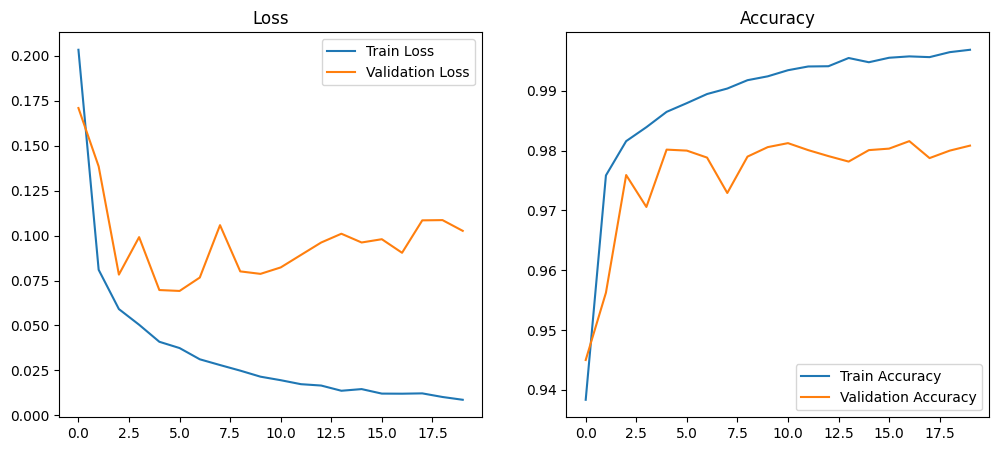

In [27]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_Conv3.history['loss'], label='Train Loss')
plt.plot(history_Conv3.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_Conv3.history['accuracy'], label='Train Accuracy')
plt.plot(history_Conv3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


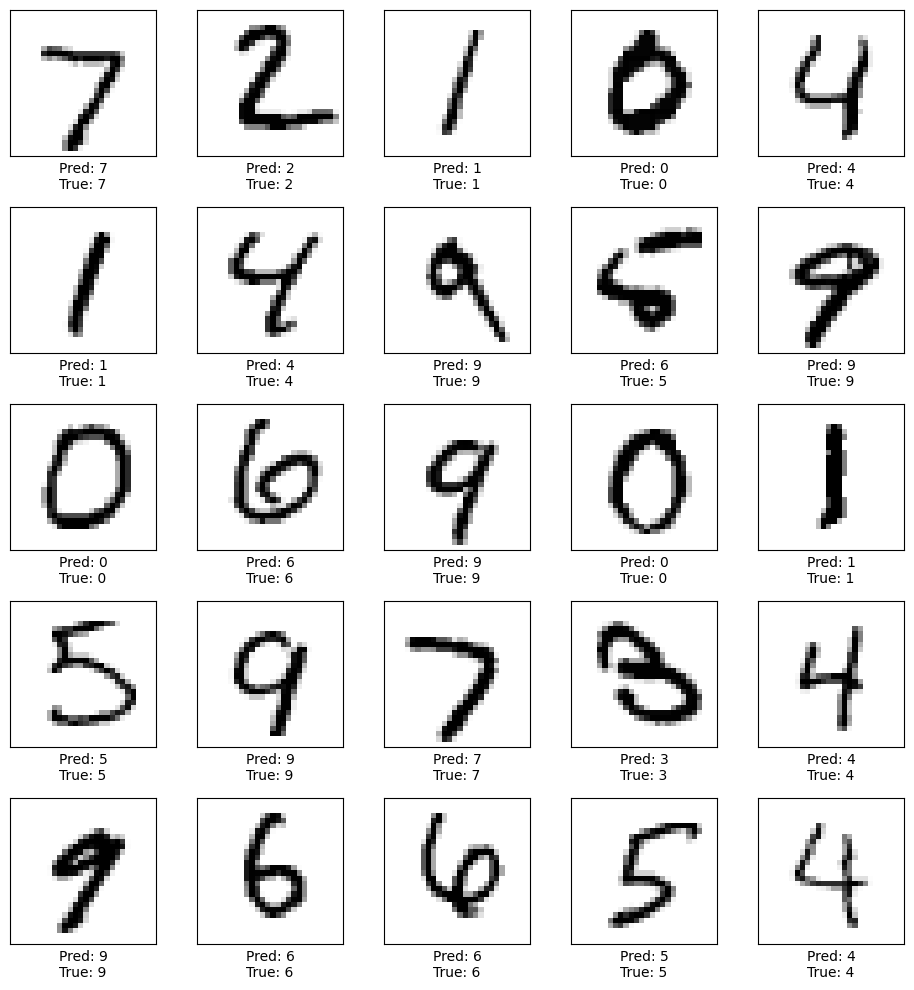

In [34]:
# Predict the classes of the test samples
y_pred = model_Conv3.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot some of the test samples along with their predicted and true classes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {y_pred_classes[i]}\nTrue: {y_true[i]}")
    plt.tight_layout()
plt.show()


---
## <u>Insights:</u>
- Best Model : `kernal = 3`, `padding = same`,accuracy `99.8%` on train, `98%` on test.
- When using padding = `'valid'`, it gives accuracy `94%` on train, `92%` on test.
- when using `kernal = 1`, it gives `94.3%` on train, `93%` on test even if padding `'same'` or `'valid'` used.


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$